In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


Load the dataset into a pandas DataFrame and display the first few rows.



In [4]:
import pandas as pd
df = pd.read_csv('Heart Prediction Quantum Dataset.csv')
display(df.head())


,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


checking its dimensions, data types, descriptive statistics, missing values, and unique values in categorical features.



In [5]:

print("Shape of the DataFrame:", df.shape)


print("\nData Types:\n", df.dtypes)

# Descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())

# Percentage of missing values
missing_percentages = df.isnull().sum() / len(df) * 100
print("\nPercentage of Missing Values:\n", missing_percentages)

# Unique values for categorical features
categorical_cols = ['Gender', 'HeartDisease']  # Assuming these are categorical
for col in categorical_cols:
    print(f"\nUnique values for {col}:\n{df[col].value_counts()}")



Shape of the DataFrame: (500, 7)

Data Types:
 Age                        int64
Gender                     int64
BloodPressure              int64
Cholesterol                int64
HeartRate                  int64
QuantumPatternFeature    float64
HeartDisease               int64
dtype: object

Descriptive Statistics:
               Age      Gender  BloodPressure  Cholesterol   HeartRate  \
count  500.000000  500.000000     500.000000    500.00000  500.000000   
mean    54.864000    0.468000     132.874000    221.50000   88.766000   
std     14.315004    0.499475      26.418516     43.86363   17.417289   
min     30.000000    0.000000      90.000000    150.00000   60.000000   
25%     43.000000    0.000000     111.000000    183.75000   73.000000   
50%     55.000000    0.000000     132.000000    221.00000   89.000000   
75%     66.250000    1.000000     155.000000    258.00000  104.000000   
max     79.000000    1.000000     179.000000    299.00000  119.000000   

       QuantumPatternFea

Distribution Analysis

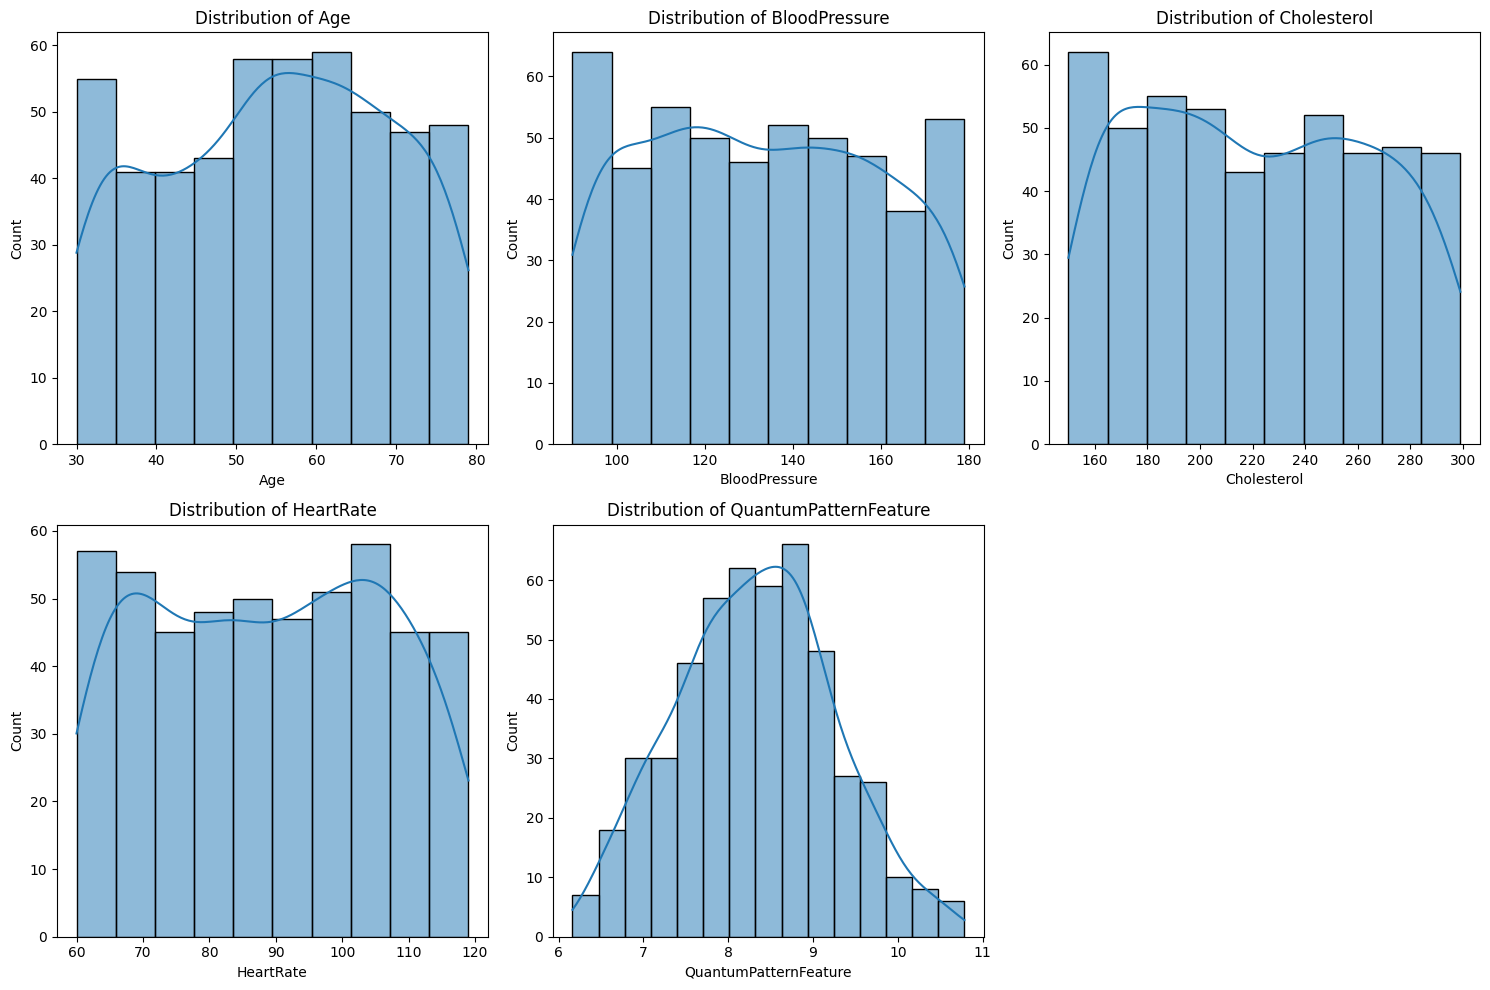

In [6]:
numerical_features = ['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Outlier Detection

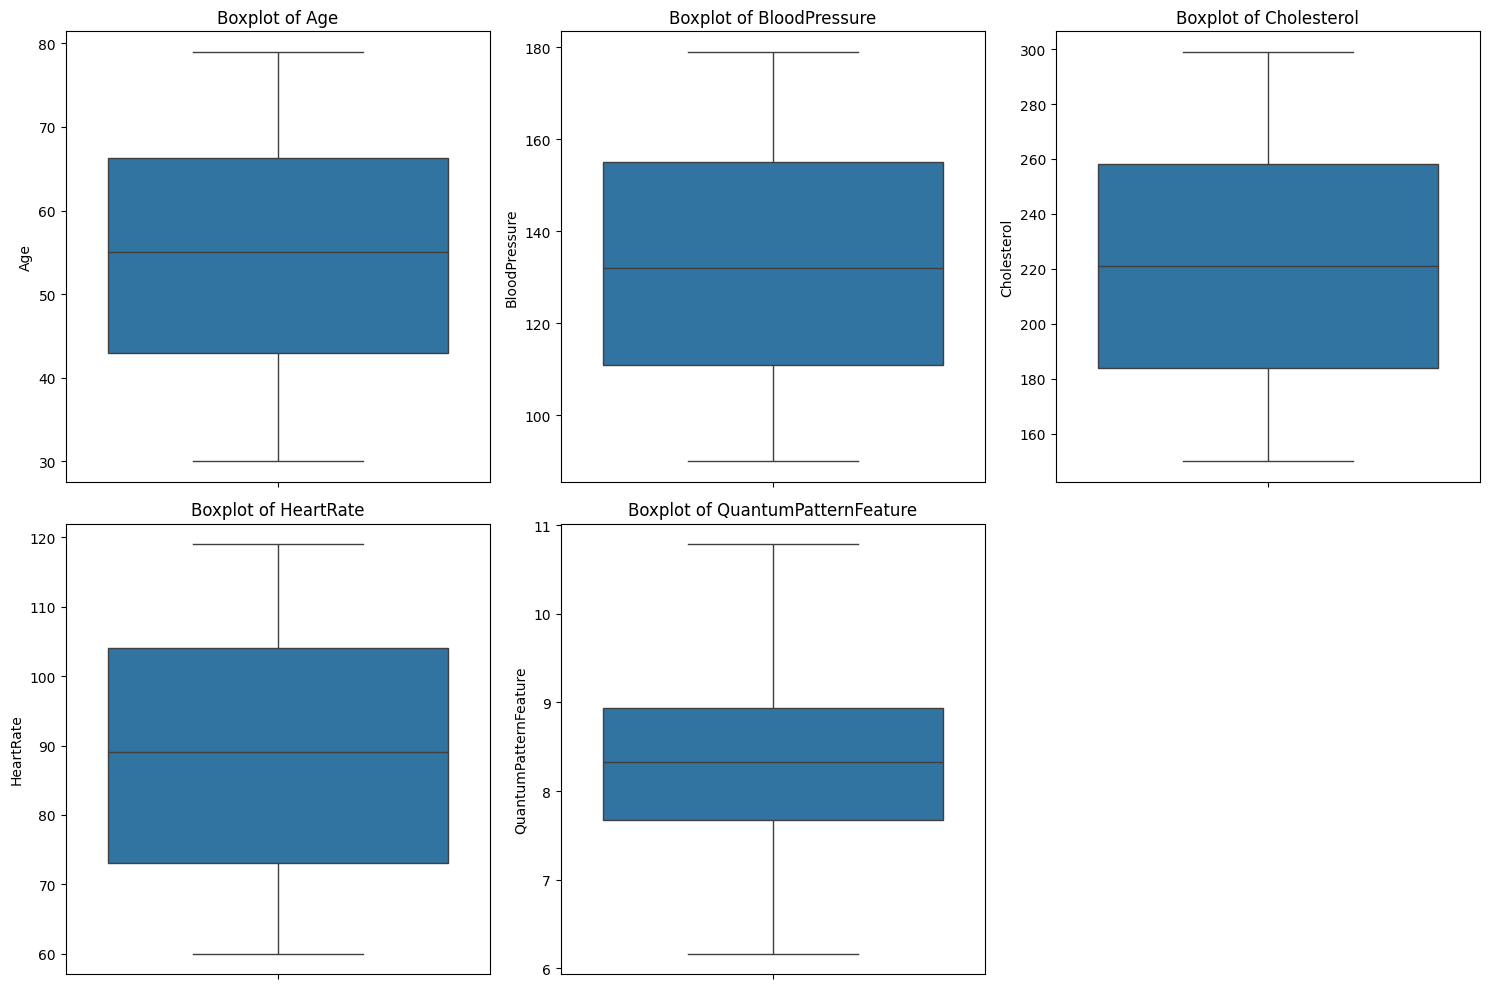

In [7]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Correlation Analysis

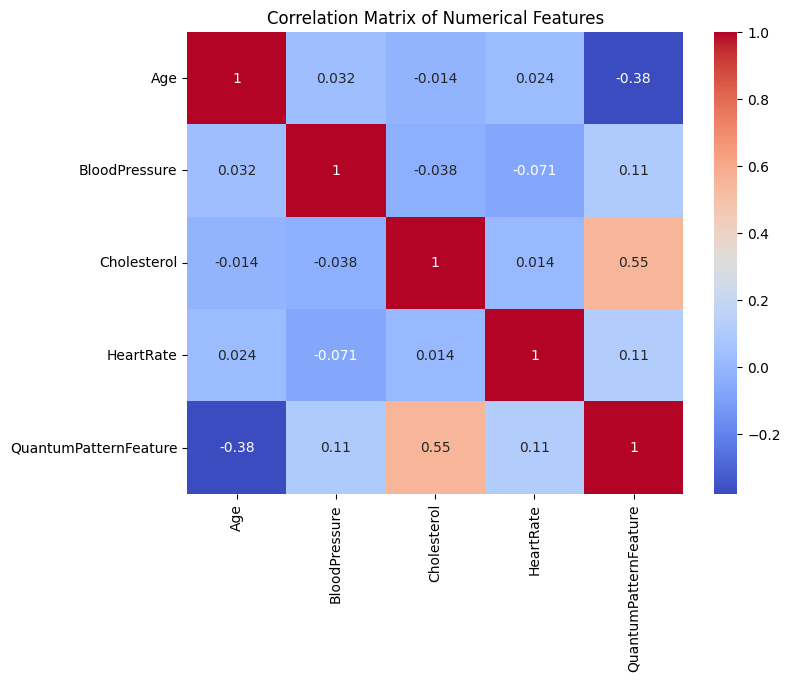

In [8]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

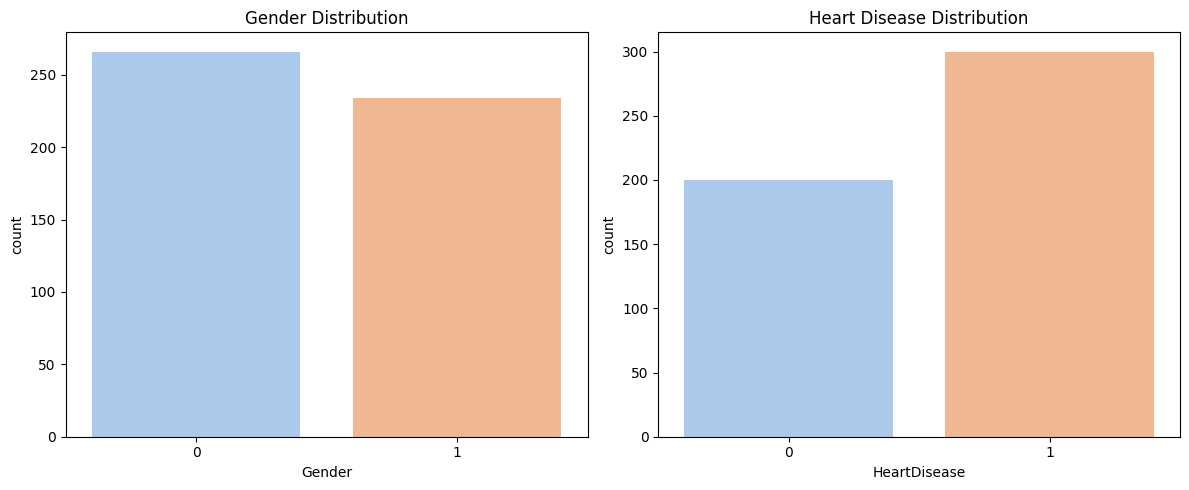

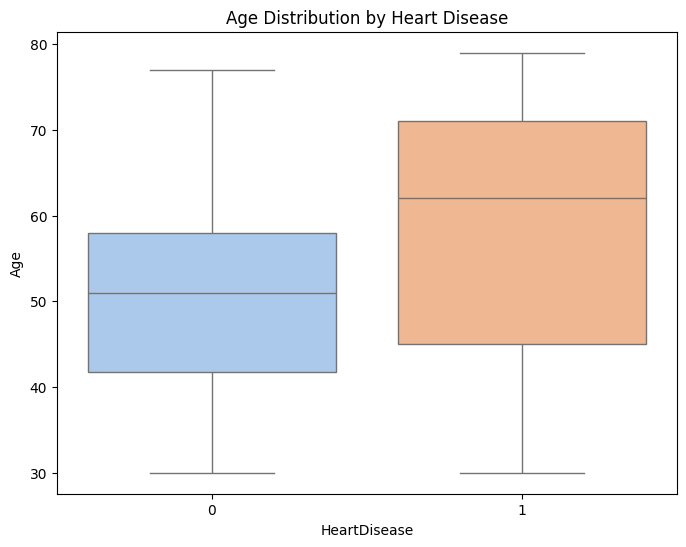

In [9]:

# Count plots for categorical features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='HeartDisease', data=df, palette='pastel')
plt.title('Heart Disease Distribution')
plt.tight_layout()
plt.show()

# Box plots of 'Age' grouped by 'HeartDisease'
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='Age', data=df, palette='pastel')
plt.title('Age Distribution by Heart Disease')
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int64  
 4   HeartRate              500 non-null    int64  
 5   QuantumPatternFeature  500 non-null    float64
 6   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


Training the models and evaluation

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [12]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
import os

if not os.path.exists("models"):
    os.makedirs("models")

In [15]:
import joblib
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    }),
    "Random Forest": (RandomForestClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }),
    "Decision Tree": (DecisionTreeClassifier(), {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    "XGBoost": (GradientBoostingClassifier(), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    "SVM": (SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    })
}

results = []


In [16]:
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    # Save the model
    model_filename = f"models/{model_name}.pkl"  # Create filename with model name
    joblib.dump(best_model, model_filename)
    print(f"{model_name} saved to {model_filename}")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC AUC: {roc_auc}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    results.append([model_name, accuracy, precision, recall, f1, roc_auc])


Training Logistic Regression...
Logistic Regression saved to models/Logistic Regression.pkl

Evaluation Metrics for Logistic Regression:
Accuracy: 0.94
Precision: 1.0
Recall: 0.9
F1-Score: 0.9473684210526315
ROC AUC: 0.95

Confusion Matrix:
[[40  0]
 [ 6 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        40
           1       1.00      0.90      0.95        60

    accuracy                           0.94       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.95      0.94      0.94       100

--------------------------------------------------
Training Random Forest...
Random Forest saved to models/Random Forest.pkl

Evaluation Metrics for Random Forest:
Accuracy: 0.93
Precision: 1.0
Recall: 0.8833333333333333
F1-Score: 0.9380530973451328
ROC AUC: 0.9416666666666667

Confusion Matrix:
[[40  0]
 [ 7 53]]

Classification Report:
              precision    recall  f1-score   sup

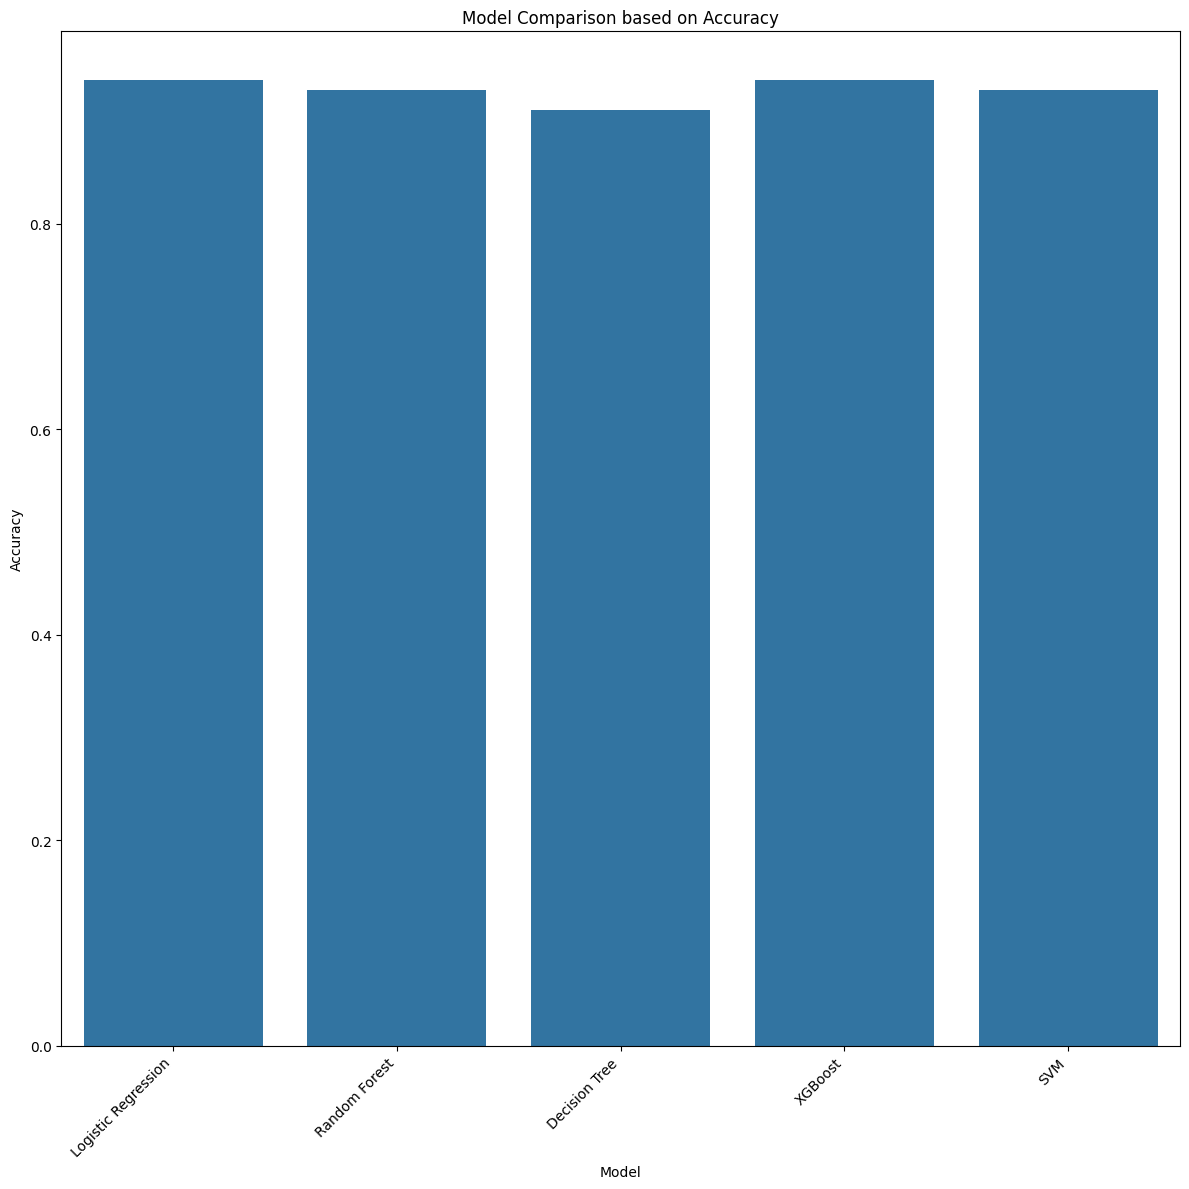

In [20]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

# Plotting the results
plt.figure(figsize=(12, 12))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Comparison based on Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
results_df.head()

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.94,1.000000,0.900000,0.947368,0.950000
1,Random Forest,0.93,1.000000,0.883333,0.938053,0.941667
2,Decision Tree,0.91,0.963636,0.883333,0.921739,0.916667
3,XGBoost,0.94,1.000000,0.900000,0.947368,0.950000
4,SVM,0.93,0.981818,0.900000,0.939130,0.937500


In [22]:
import joblib
import numpy as np

# Load the model
model_filename = "models/Logistic Regression.pkl"
loaded_model = joblib.load(model_filename)

# Prepare new data as an array
new_data = [[55, 130, 200, 75, 1.2, 1]]

# Make prediction
new_data_array = np.array(new_data)
prediction = loaded_model.predict(new_data_array)

print("Prediction:", prediction[0])

Prediction: 1
